In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

In [2]:
# Loading the data
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


##### Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
data.shape

(284807, 31)

In [5]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

##### Data Cleaning

In [6]:
data.isnull().values.any()

False

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
data.duplicated().any()

True

In [9]:
data.duplicated().sum()

1081

In [10]:
data.drop_duplicates(inplace=True)

##### Exploratory Data Analysis

In [11]:
# Check the correlation
correlations = data.corr()
correlations

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


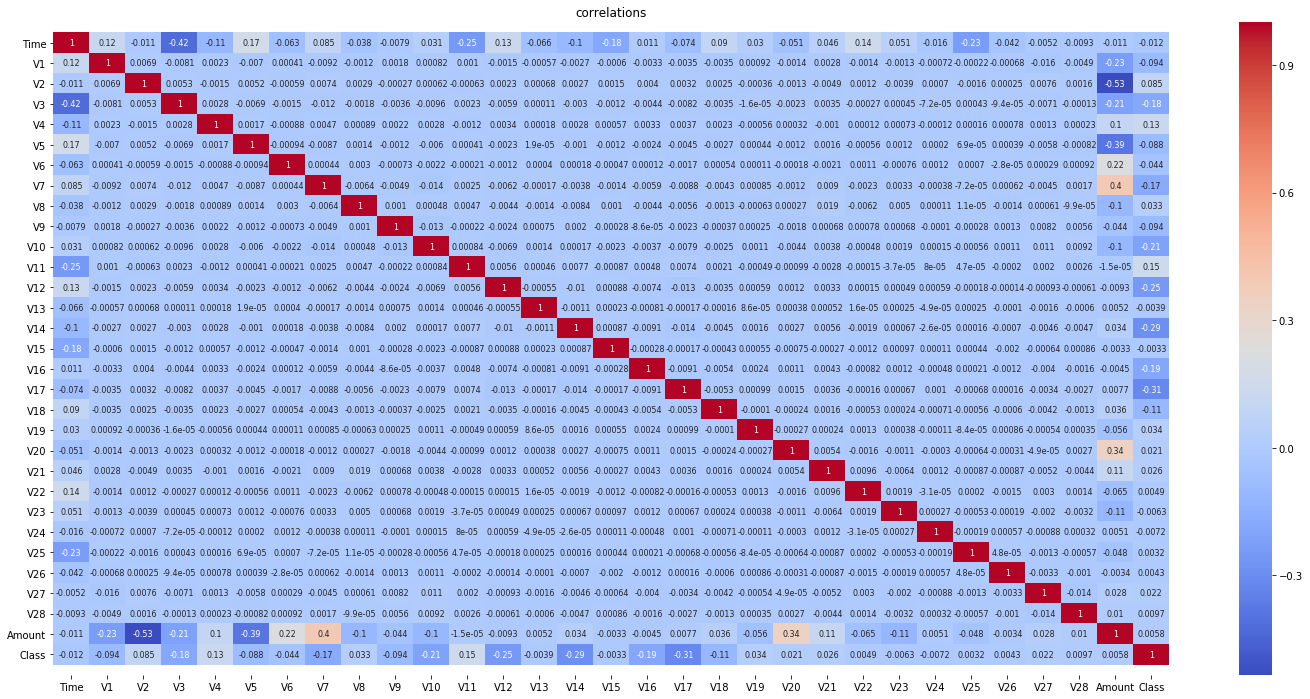

In [12]:
#Heatmap
plt.figure(figsize=(25,12))
ax = sns.heatmap(correlations,annot=True,cmap='coolwarm',annot_kws={'size': 8})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('correlations')
plt.show()

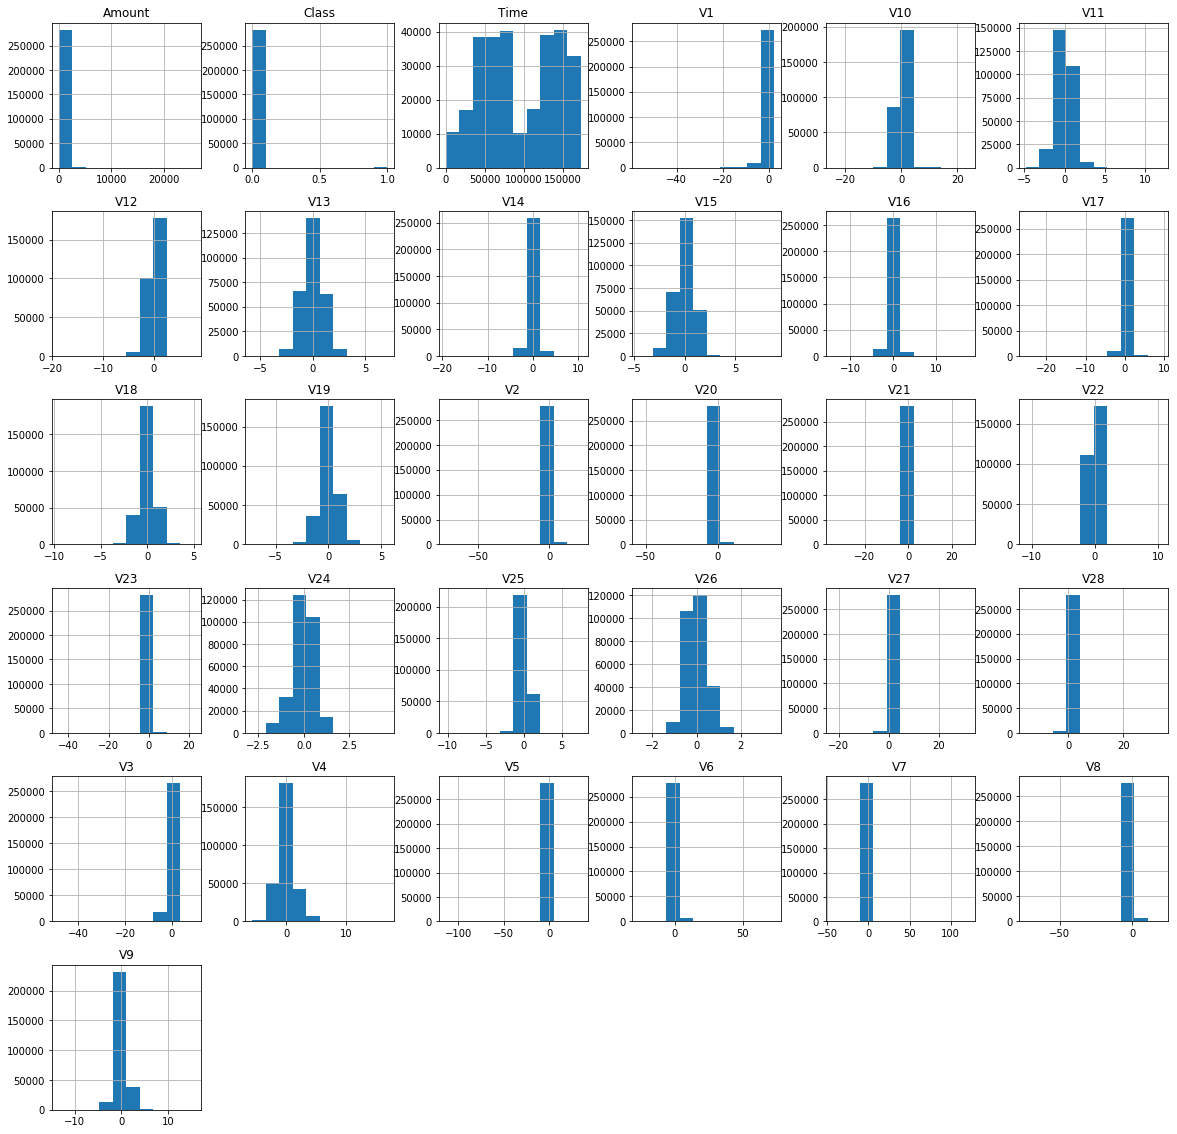

In [13]:
# histogram
data.hist(figsize = (20, 20))
plt.show()

Most of the data for class attribute is centered around 0. Let's find the distribution percentage.

In [14]:
total_transactions = len(data['Class'])
fraud_transactions = len(data[data['Class']==1])
valid_transactions = len(data[data['Class']==0])

percentage_fraud = fraud_transactions/total_transactions
print(percentage_fraud)

percentage_valid = valid_transactions/total_transactions
print(percentage_valid)

0.001667101358352777
0.9983328986416472


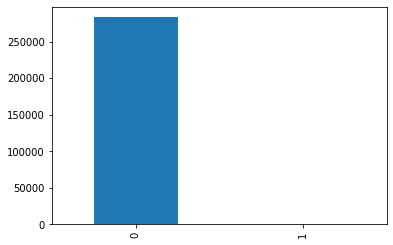

In [15]:
#bar plot to chech the distribution of class
data['Class'].value_counts().plot(kind = 'bar',)

We can see the data is highly imbalanced class and the Accuracy Metric can be misleading when working with imbalance datasets.

we need to do Resampling in this case.

##### Data Preprocessing

In [16]:
#Robust Scaler
from sklearn.preprocessing import RobustScaler

rb = RobustScaler()
data['Time'] = rb.fit_transform(data['Time'].values.reshape(-1,1))
data['Amount'] = rb.fit_transform(data['Amount'].values.reshape(-1,1))
data.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.995290,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.774718,0
1,-0.995290,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.268530,0
2,-0.995279,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.959811,0
3,-0.995279,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.411487,0
4,-0.995267,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.667362,0
5,-0.995267,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.254902,0
6,-0.995243,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.236546,0
7,-0.995208,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.261438,0
8,-0.995208,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.990127,0
9,-0.995185,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.254763,0


##### SMOTE Over Sampling

In [17]:
X = data.drop('Class',axis = 1)
y = data['Class']

In [18]:
X.shape

(283726, 30)

In [19]:
y.shape

(283726,)

In [20]:
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(random_state=60)
x_resampled, y_resampled = over_sampler.fit_resample(X, y)

In [21]:
x_resampled.shape

(566506, 30)

In [22]:
y_resampled.shape

(566506,)

In [23]:
np.unique(y_resampled,return_counts=True)

(array([0, 1], dtype=int64), array([283253, 283253], dtype=int64))

##### Model Building

In [24]:
X_Train,X_Test,y_Train,y_Test = train_test_split(x_resampled,y_resampled,test_size = 0.3,random_state = 42)

### Logistic Regression

In [25]:
lgr = LogisticRegression()
lgr.fit(X_Train,y_Train)

#Predicting the wage_class using test_features
pred_lgr = lgr.predict(X_Test)

In [26]:
#Confusion Matrix
confusion_matrix(y_Test,pred_lgr)

array([[82745,  2135],
       [ 6825, 78247]], dtype=int64)

In [27]:
#Accuracy Score
accuracy_score_lgr = accuracy_score(y_Test,pred_lgr)
accuracy_score_lgr

0.9472792317830917

In [28]:
#Precision Score
precision_score_lgr = precision_score(y_Test,pred_lgr)
precision_score_lgr

0.97343932721256

In [29]:
#Recall Score
recall_score_lgr = recall_score(y_Test,pred_lgr)
recall_score_lgr

0.9197738386308069

In [30]:
#ROC AUC Score
roc_auc_score_lgr = roc_auc_score(y_Test,pred_lgr)
roc_auc_score_lgr

0.9473103406160631

In [31]:
false_positive_rate_lgr, true_positive_rate_lgr, threshold = roc_curve(y_Test, pred_lgr)

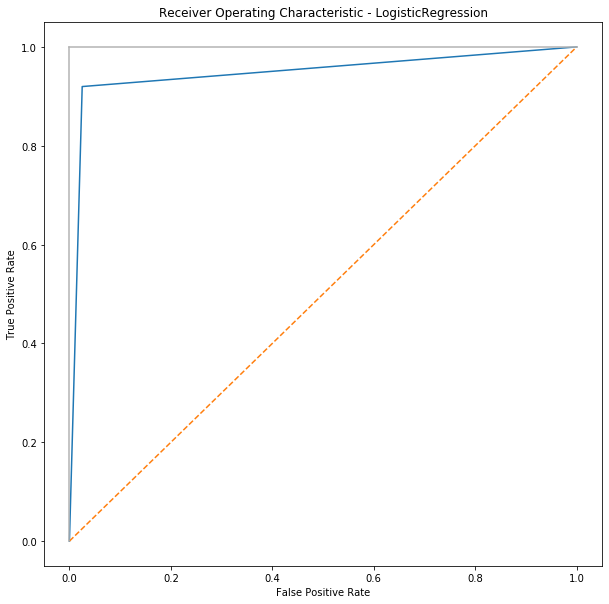

In [32]:
plt.figure(figsize=(10,10))
plt.plot(false_positive_rate_lgr, true_positive_rate_lgr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), 
plt.plot([1, 1] , c=".7")
plt.title('Receiver Operating Characteristic - LogisticRegression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree

In [33]:
dtc = DecisionTreeClassifier(random_state=1, min_samples_leaf=2)
dtc.fit(X_Train,y_Train)

#Predicting the wage_class using test_features
pred_dtc = dtc.predict(X_Test)

In [34]:
#Confusion Matrix
confusion_matrix(y_Test,pred_dtc)

array([[84631,   249],
       [  177, 84895]], dtype=int64)

In [35]:
#Accuracy Score
accuracy_score_dtc = accuracy_score(y_Test,pred_dtc)
accuracy_score_dtc

0.9974934099039728

In [36]:
#Precision Score
precision_score_dtc = precision_score(y_Test,pred_dtc)
precision_score_dtc

0.9970755426101663

In [37]:
#Recall Score
recall_score_dtc = recall_score(y_Test,pred_dtc)
recall_score_dtc

0.9979194094414143

In [38]:
#Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_Test,pred_dtc)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84880
           1       1.00      1.00      1.00     85072

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952



In [39]:
#ROC AUC Score
roc_auc_score_dtc = roc_auc_score(y_Test,pred_dtc)
roc_auc_score_dtc

0.9974929280948824

In [40]:
false_positive_rate_dtc, true_positive_rate_dtc, threshold = roc_curve(y_Test, pred_dtc)

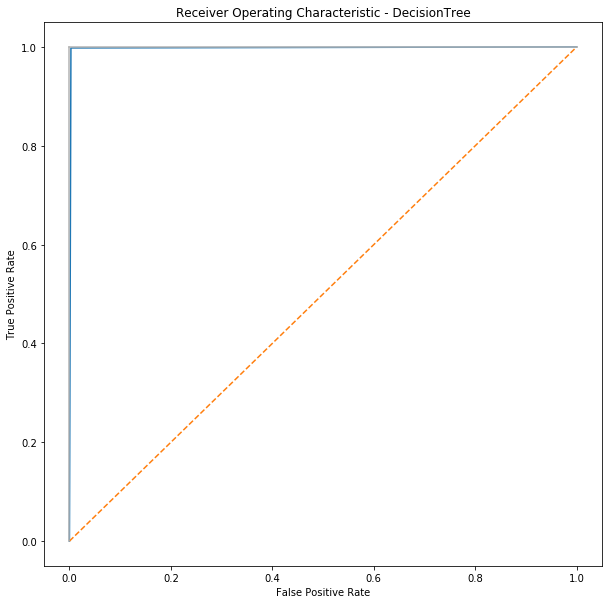

In [41]:
plt.figure(figsize=(10,10))
plt.plot(false_positive_rate_dtc, true_positive_rate_dtc)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), 
plt.plot([1, 1] , c=".7")
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest

In [42]:
#Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_Train,y_Train)

#Prediction
pred_rfc = rfc.predict(X_Test)

In [43]:
#Confusion Matrix
confusion_matrix(y_Test,pred_rfc)

array([[84855,    25],
       [    0, 85072]], dtype=int64)

In [44]:
#Accuracy Score
accuracy_score_rfc = accuracy_score(y_Test,pred_rfc)
accuracy_score_rfc

0.9998528996422519

In [45]:
#Precision Score
precision_score_rfc = precision_score(y_Test,pred_rfc)
precision_score_rfc

0.9997062176104916

In [46]:
#Recall Score
recall_score_rfc = recall_score(y_Test,pred_rfc)
recall_score_rfc

1.0

In [47]:
#Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_Test,pred_rfc)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84880
           1       1.00      1.00      1.00     85072

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952



In [48]:
#ROC AUC Score
roc_auc_score_rfc = roc_auc_score(y_Test,pred_rfc)
roc_auc_score_rfc

0.9998527332704995

In [49]:
false_positive_rate_rfc, true_positive_rate_rfc, threshold = roc_curve(y_Test, pred_rfc)

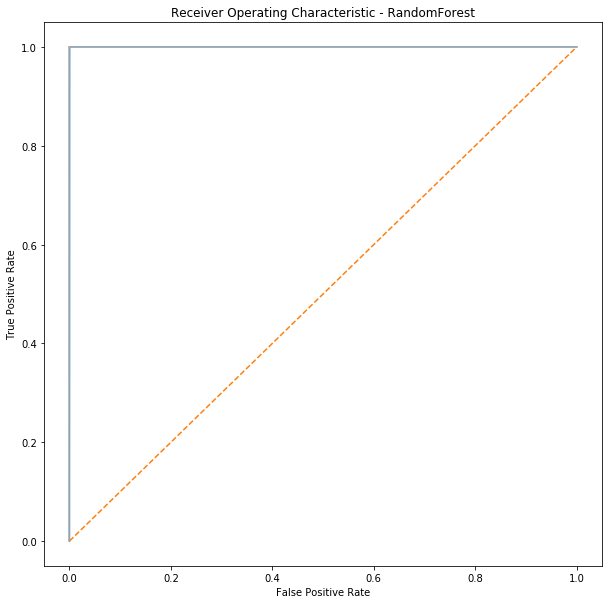

In [50]:
plt.figure(figsize=(10,10))
plt.plot(false_positive_rate_rfc, true_positive_rate_rfc)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), 
plt.plot([1, 1] , c=".7")
plt.title('Receiver Operating Characteristic - RandomForest')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### XGBoost

In [51]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 1.0,
    'silent': 1,
    'n_estimators': 5
}

In [52]:
#XGBoost classifier
xgb = XGBClassifier(**params)
xgb.fit(X_Train,y_Train)

#Prediction
pred_xgb = xgb.predict(X_Test)

In [53]:
#Confusion Matrix
confusion_matrix(y_Test,pred_xgb)

array([[81163,  3717],
       [ 5460, 79612]], dtype=int64)

In [54]:
#Accuracy Score
accuracy_score_xgb = accuracy_score(y_Test,pred_xgb)
accuracy_score_xgb

0.9460024006778385

In [55]:
#Precision Score
precision_score_xgb = precision_score(y_Test,pred_xgb)
precision_score_xgb

0.9553936804713845

In [56]:
#Recall Score
recall_score_xgb = recall_score(y_Test,pred_xgb)
recall_score_xgb

0.9358190709046454

In [57]:
#Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_Test,pred_xgb)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     84880
           1       0.96      0.94      0.95     85072

    accuracy                           0.95    169952
   macro avg       0.95      0.95      0.95    169952
weighted avg       0.95      0.95      0.95    169952



In [58]:
#Applying k-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgb, X = X_Train,y = y_Train, cv = 10)
accuracies

array([0.94684285, 0.94674198, 0.94449768, 0.94613678, 0.94411802,
       0.94489976, 0.9466902 , 0.94648846, 0.94618585, 0.94671542])

In [59]:
accuracies.mean()

0.9459317003674548

In [60]:
#ROC AUC Score
roc_auc_score_xgb = roc_auc_score(y_Test,pred_xgb)
roc_auc_score_xgb

0.9460139181101926

In [61]:
false_positive_rate_xgb, true_positive_rate_xgb, threshold = roc_curve(y_Test, pred_xgb)

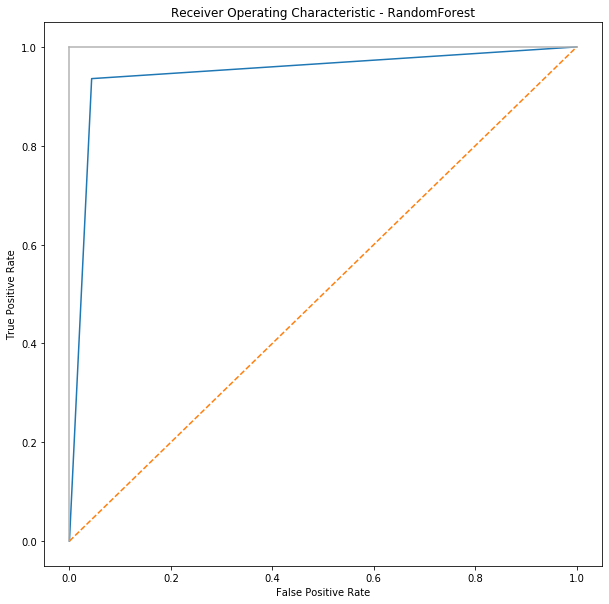

In [62]:
plt.figure(figsize=(10,10))
plt.plot(false_positive_rate_xgb, true_positive_rate_xgb)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), 
plt.plot([1, 1] , c=".7")
plt.title('Receiver Operating Characteristic - RandomForest')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Model Comparison

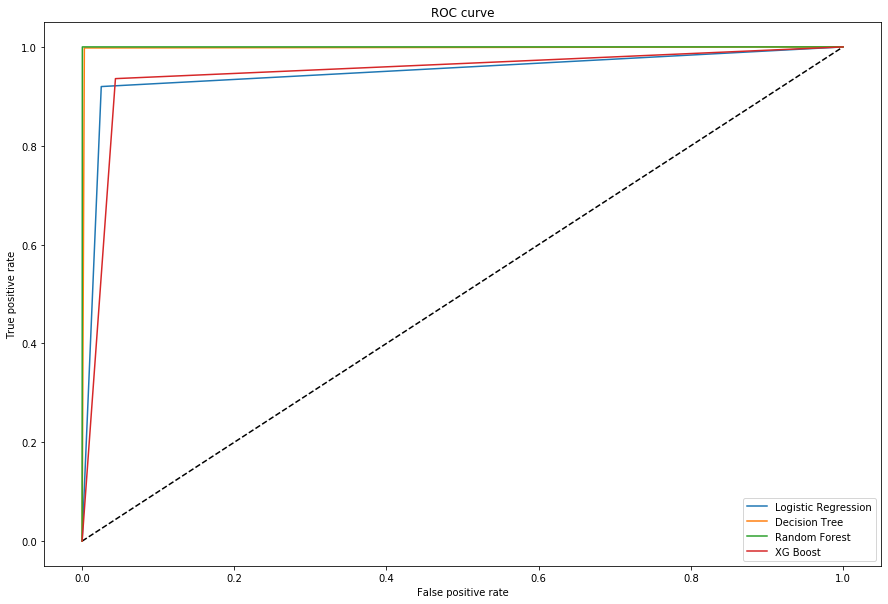

In [63]:
# Plot the ROC Curve
plt.figure(figsize=(15, 10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_positive_rate_lgr, true_positive_rate_lgr, label='Logistic Regression')
plt.plot(false_positive_rate_dtc, true_positive_rate_dtc, label='Decision Tree')
plt.plot(false_positive_rate_rfc, true_positive_rate_rfc, label='Random Forest')
plt.plot(false_positive_rate_xgb, true_positive_rate_xgb, label='XG Boost')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

###### Random Forest and Decision Tree have the highest accuracy score. Hence they are the best algorithm for this dataset.